> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
##### 1- Who are the top 5 directors ?  
##### 2- Which genres are most popular from year to year ?
##### 3- In which year were the most films made ?
##### 4- Does the movie's budget affect the rating ?
##### 5- Does a movie's budget affect its popularity ?
##### 6- Is there a colleration between budget and popularity ?
##### 7- Does the movie's popularity affect its profit ?

In [81]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [82]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==1.3.5

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [83]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [84]:
df.shape

(10866, 21)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [86]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [87]:
df['director'].nunique()

5067

In [88]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [89]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [90]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [91]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [92]:
df['runtime'].unique().sum()


37475

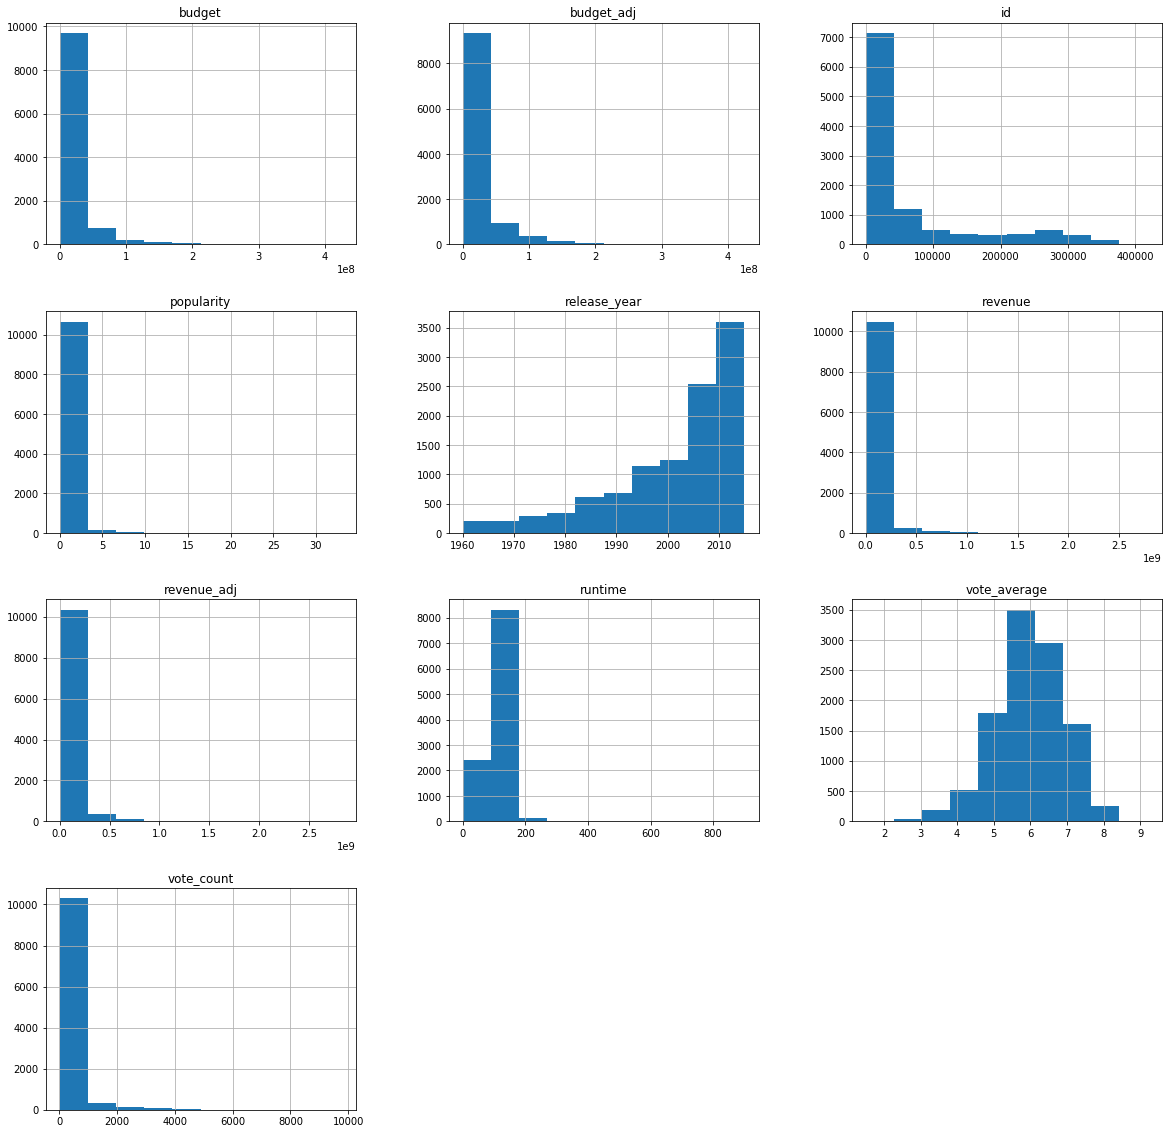

In [93]:
df.hist(figsize=(20,20));


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [94]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop([ 'imdb_id', 'homepage','id', 'overview', 'keywords'],axis=1, inplace=True)

In [95]:
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [96]:
df.shape

(10866, 16)

In [97]:
#drop NAN date
df.dropna(inplace=True)

In [98]:
#Make sure we drop all NAN data
df.isnull().sum().any()

False

In [99]:
#drop duplicated columns
df.drop_duplicates(inplace=True)

In [100]:
# Make sure we drop all duplicate columns
df.duplicated().sum().any()

False

In [101]:
#filter columns runtime = 0
df_zero_runtime = df.query('runtime == "0"')
# drop this columns
df.drop(labels = df_zero_runtime.index.values, inplace = True)



In [102]:
#zero_runtime_list=[334, 1289, 1293]
#df.drop(labels = zero_runtime_list, inplace = True)


In [103]:
#Make sure we drop all thie columns
df.query('runtime == "0"').any()


popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
tagline                 False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [104]:
#filter columns budget = 0
df_zero_budget = df.query('budget == "0"')
# drop this columns
df.drop(labels = df_zero_budget.index.values, inplace = True)


In [105]:
#Make sure we drop all thie columns
df.query('budget == "0"').any()

popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
tagline                 False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (The directors with the five best-rated films)

In [106]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df_1 = df.groupby('director').mean().vote_average
df_2 = df_1.nlargest(5)
df_2

director
Damien Chazelle     8.2
Lenny Abrahamson    8.0
Morten Tyldum       8.0
Pete Docter         8.0
Tony Kaye           8.0
Name: vote_average, dtype: float64

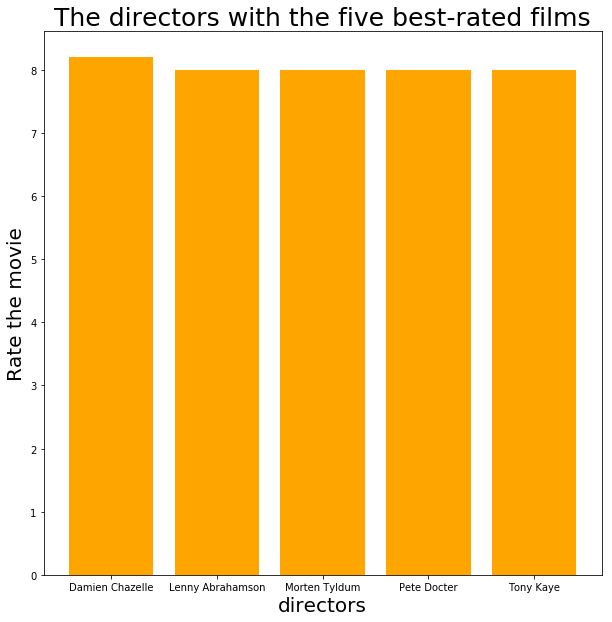

In [107]:
plt.subplots(figsize=(10, 10))
plt.bar(df_2.index, df_2, color = 'orange');
plt.title('The directors with the five best-rated films',fontsize=25)
plt.xlabel('directors',fontsize=20)
plt.ylabel('Rate the movie',fontsize=20);


According to the figure above, the top 5 directors rated for their films are:
1- Al Reinert
2- Damien Chazelle
3- Frank Pavich 
4- Richard Press  
5- Cyrus Nowrasteh

### Research Question 2  (The most common gernes)

In [108]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
def data(column):
    #will take a column, and separate the string by '|'
    data_genres = df[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data_genres = pd.Series(data_genres.split('|'))
    
    #arranging in descending order
    count_gernes = data_genres.value_counts(ascending = False)
    
    return count_gernes


In [109]:
count_gernes = data('genres')
count_gernes.head(10)


Drama              1942
Comedy             1529
Thriller           1473
Action             1285
Adventure           833
Crime               749
Romance             722
Horror              678
Science Fiction     649
Family              476
dtype: int64

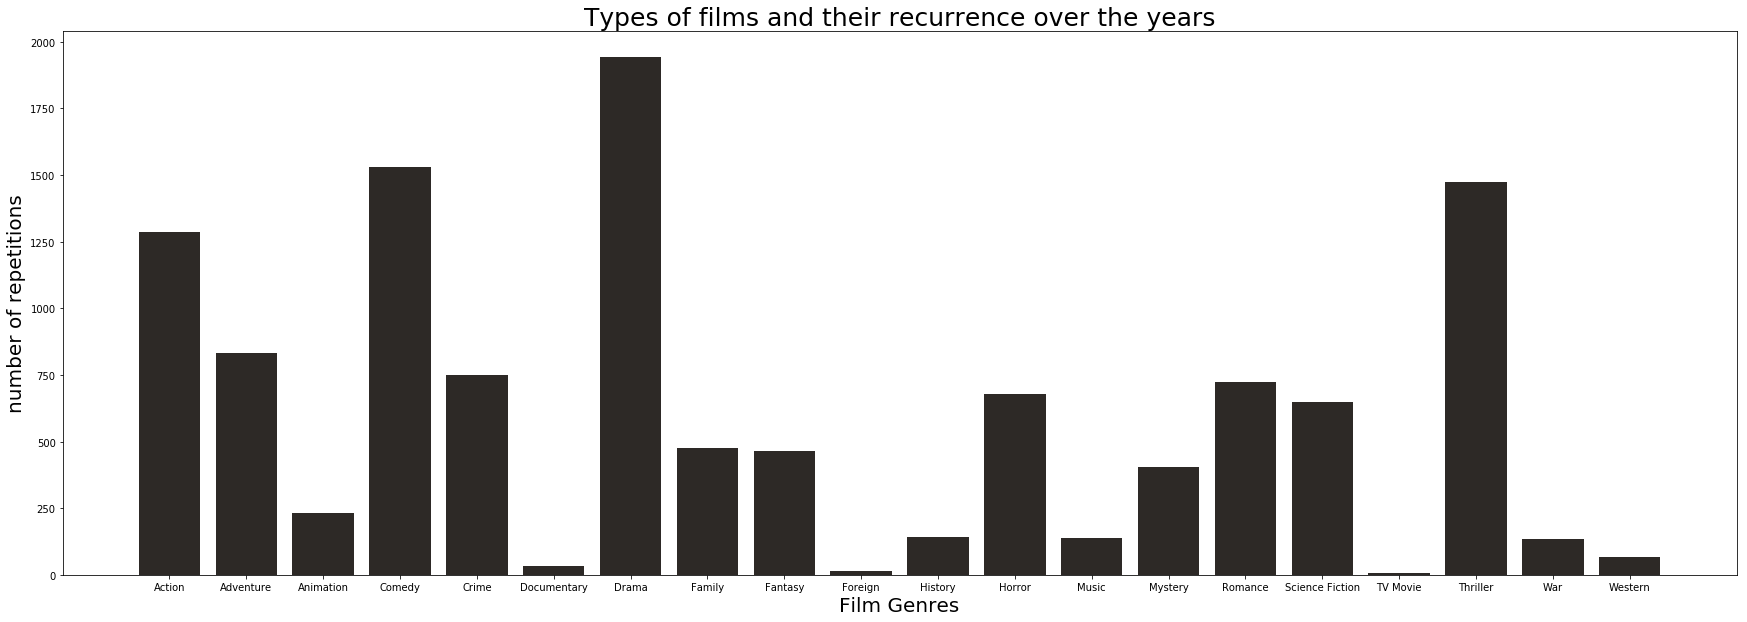

In [110]:
plt.subplots(figsize=(30, 10))
plt.bar(count_gernes.index, count_gernes,color='#2D2926FF')
plt.title('Types of films and their recurrence over the years',fontsize=25)
plt.xlabel('Film Genres',fontsize=20)
plt.ylabel('number of repetitions',fontsize=20);

The figure above describes the recurrences of the types of films

### Research Question 3  (Over five years, films have been made)

In [111]:
df_year = df['release_year'].value_counts()
year = df_year.nlargest(5)

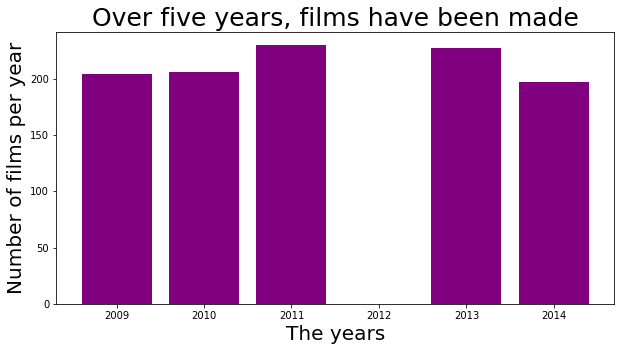

In [112]:
plt.subplots(figsize=(10, 5))
plt.bar( year.index,  year, color='purple')
plt.title('Over five years, films have been made',fontsize=25)
plt.xlabel('The years',fontsize=20)
plt.ylabel('Number of films per year',fontsize=20);

The figure above shows which five years the most films were made


### Research Question 4  (Does the movie's budget affect the rating?)


In [113]:
vote_budget = df[["vote_average", "budget"]].sort_values(["vote_average","budget"], ascending = False)
vote_budget.head(10)

,vote_average,budget
4178,8.4,25000000
7948,8.4,1200000
7269,8.3,6000000
650,8.2,3300000
2875,8.1,185000000
2409,8.1,63000000
4179,8.1,55000000
3826,8.1,30000000
10222,8.1,22000000
9758,8.1,13000000


In [ ]:
df.plot(x='vote_average', y='budget', kind='scatter', color='blue')
plt.title('Budget VS Vote', fontsize=25)
plt.xlabel('Movie rating', fontsize=20)
plt.ylabel('Budget', fontsize=20);
plt.show()

There is a slight impact on the film's over-budget rating

### Research Question 5  (Does a movie's budget affect its popularity?)

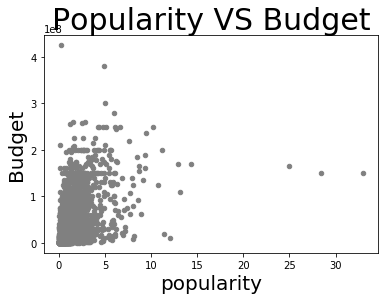

In [68]:
df.plot(x='popularity', y='budget', kind='scatter', color='gray')
plt.title('Popularity VS Budget', fontsize=30)
plt.xlabel('popularity', fontsize=20)
plt.ylabel('Budget', fontsize=20);
plt.show()

We see here that the higher the budget, the more popular the movie

### Research Question 6  (Is there a colleration between budget and popularity?)

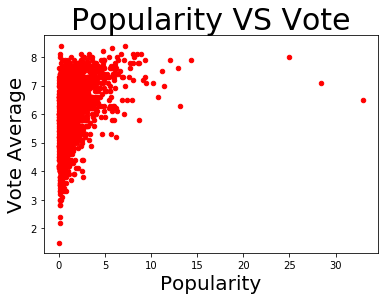

In [62]:
df.plot(x='popularity', y='vote_average', kind='scatter',color='red')
plt.title('Popularity VS Vote', fontsize=30)
plt.xlabel('Popularity', fontsize=20)
plt.ylabel('Vote Average', fontsize=20);
plt.show()

We see a positive colleration between the Vote of the film and its popularity

### Research Question 7  (Does the movie's popularity affect its profit?)

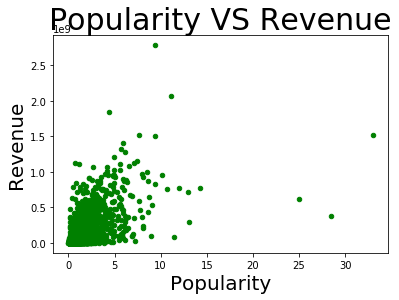

In [65]:
df.plot(x='popularity', y='revenue', kind='scatter',color='green')
plt.title('Popularity VS Revenue', fontsize=30)
plt.xlabel('Popularity', fontsize=20)
plt.ylabel('Revenue', fontsize=20);
plt.show()

There is a positive effect between the movie's profit and its popularity

<a id='conclusions'></a>
## Conclusions

The most rated appraiser for his movie is Al Reinert

The most popular genre of films is drama, followed by comedy, followed by thriller

The most successful year in the film industry is 2014

The budget of the film positively affects the rating of the film

Budget affects the popularity of the movie positively

Movies with high ratings are very popular

The movie earns more when its popularity increases

### Limitations
The dataset contains a large amount of 0 and NaN values

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0